<a href="https://colab.research.google.com/github/josejulianhidayat/Data_Mining/blob/main/04_Clustering_Sereal_(Pengelompokan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT STUDI KASUS CEREAL BY JOSE JULIAN HIDAYAT PART 3**

**Clustering Sereal (Pengelompokan)**


In [3]:
#Install Library Pandas
#Install Library Matplotlib
#Install Library Seaborn
#Install Scikit-Learn
!pip install Pandas Seaborn Matplotlib scikit-learn

In [4]:
#Mengaktifkan Fungsi Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# Membaca Dataset
file_url = "https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/cereal.csv"
df = pd.read_csv(file_url)

In [6]:
#Menampilkan 10 Baris Pertama
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,FDA_25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,FDA_25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,FDA_25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,FDA_25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,FDA_25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,FDA_25,3,1.00,0.67,53.313813


In [7]:
# Statistik deskriptif
print("Statistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.802632   
std     19.484119   1.094790   1.006473   83.832295   2.383364   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass      shelf     weight       cups     rating  
count  76.000000   75.000000  77.000000  77.000000  77.000000  77.000000  
mean    7.026316   98.666667   2.207792   1.029610   0.821039  42.665705  
std     4.378656   70.410636   0.832524   0.150477   0.2327

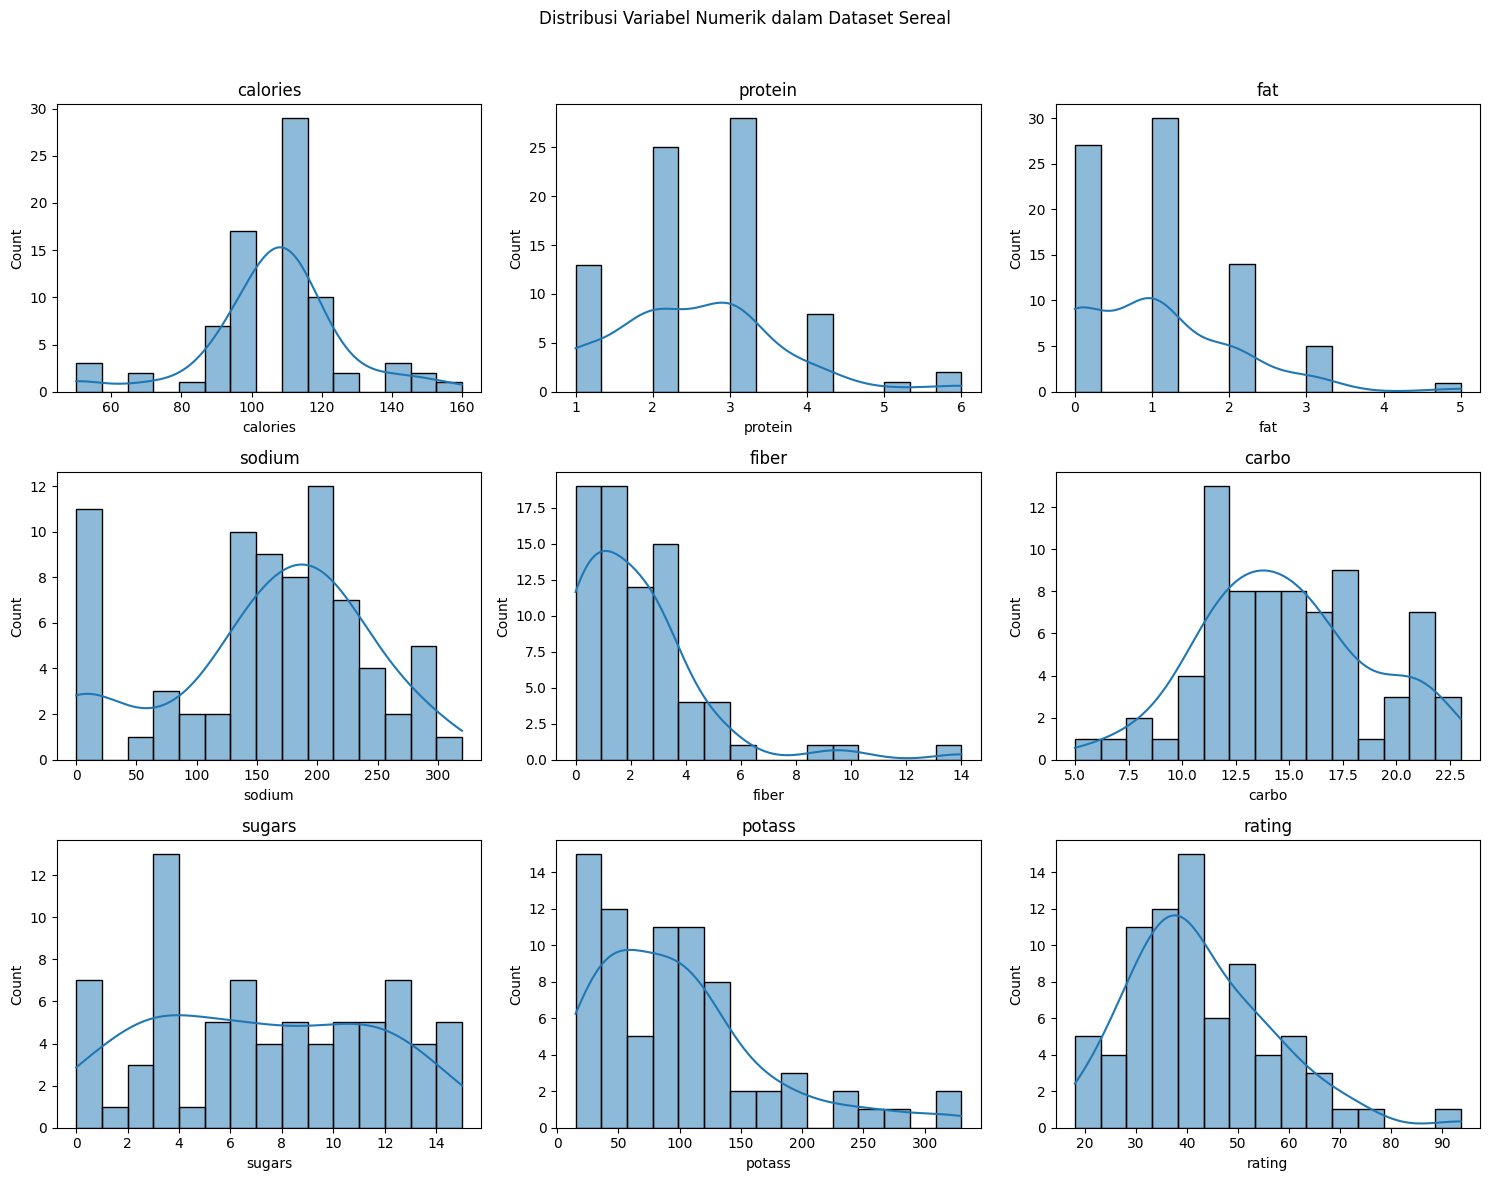

In [8]:
# Visualisasi distribusi variabel numerik
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Distribusi Variabel Numerik dalam Dataset Sereal")

numeric_columns = ["calories", "protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass", "rating"]
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col].dropna(), bins=15, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

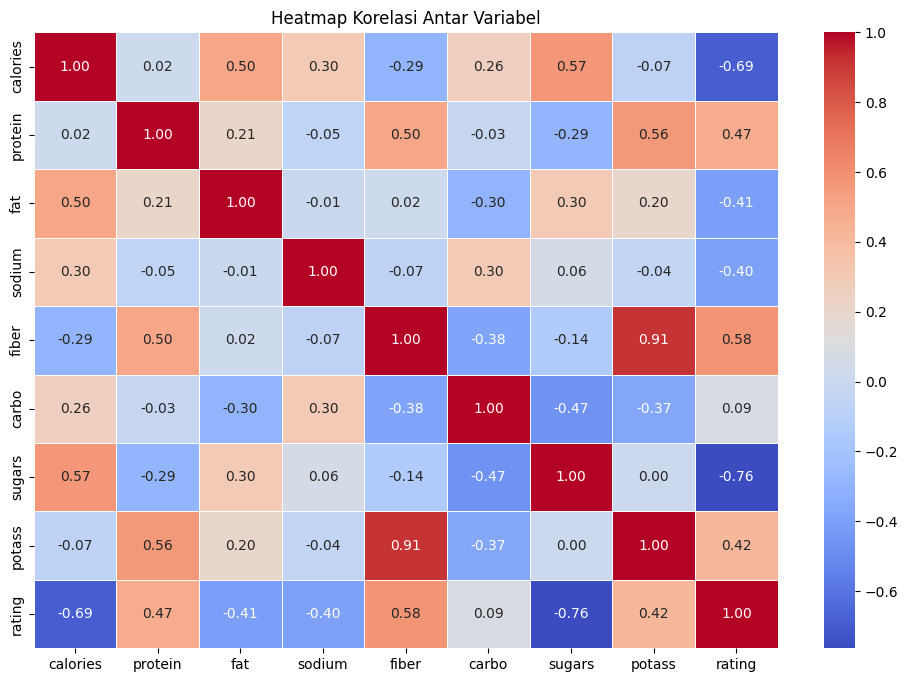

In [9]:
# Analisis Korelasi Antar Variabel
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

<Figure size 1200x600 with 0 Axes>

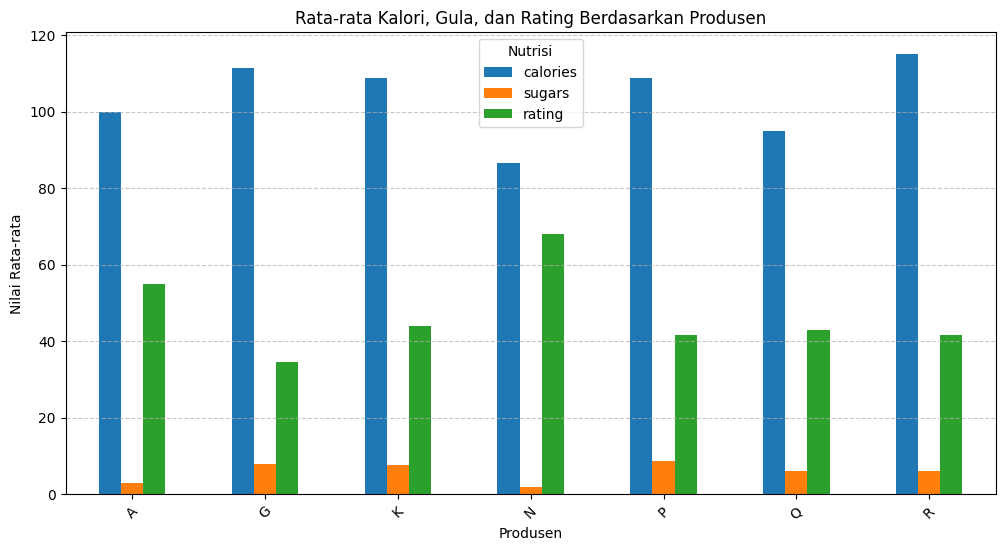

In [10]:
# Analisis Produsen Sereal
plt.figure(figsize=(12, 6))
manufacturer_stats = df.groupby("mfr")[["calories", "sugars", "rating"]].mean()
manufacturer_stats.plot(kind='bar', figsize=(12, 6))
plt.title("Rata-rata Kalori, Gula, dan Rating Berdasarkan Produsen")
plt.xlabel("Produsen")
plt.ylabel("Nilai Rata-rata")
plt.legend(title="Nutrisi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# Clustering Sereal (Pengelompokan dengan K-Means)
features = ["calories", "protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass"]
X = df[features].dropna()

In [12]:
# Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

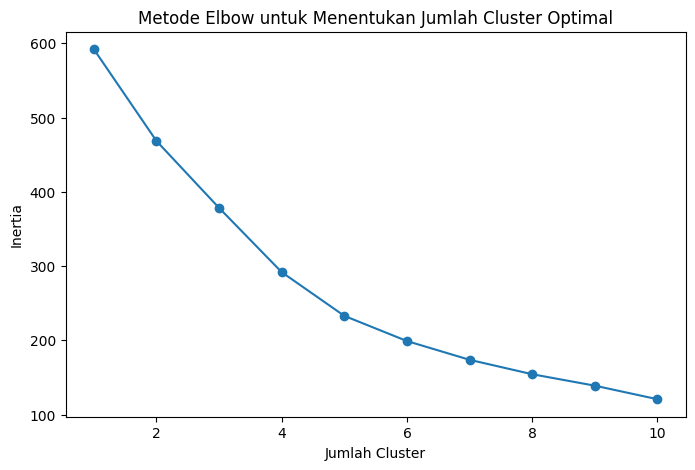

In [14]:
# Menentukan jumlah cluster optimal dengan metode Elbow
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Metode Elbow untuk Menentukan Jumlah Cluster Optimal")
plt.show()

In [16]:
# Menjalankan K-Means dengan 3 cluster (contoh)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X_scaled)

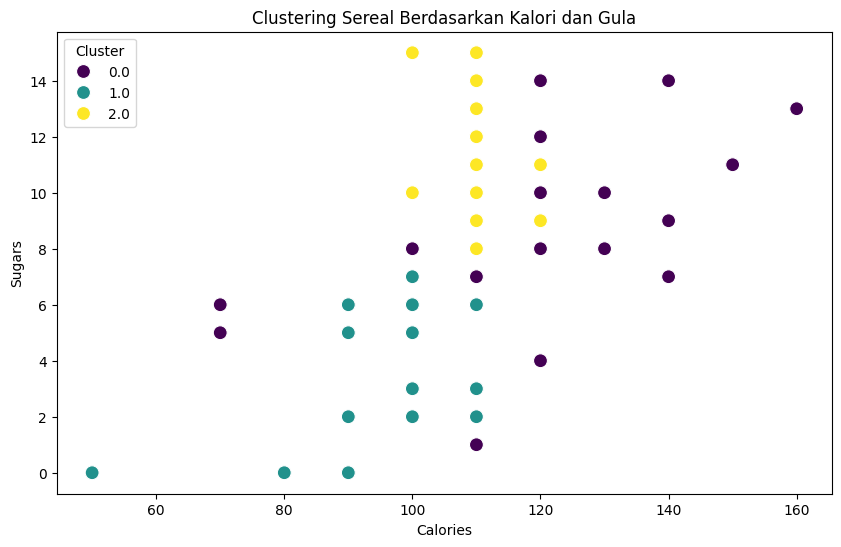

In [17]:

# Visualisasi Hasil Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.loc[X.index, "calories"], y=df.loc[X.index, "sugars"], hue=df.loc[X.index, "Cluster"], palette="viridis", s=100)
plt.xlabel("Calories")
plt.ylabel("Sugars")
plt.title("Clustering Sereal Berdasarkan Kalori dan Gula")
plt.legend(title="Cluster")
plt.show()